# Flight Price Prediction 
**OBJECTIVE:**
* Predict flight ticket prices based on date, destination, and other factors. 

**DATA COLLECTION:**
* Data is collected from Kaggle: Flight Price Prediction uploaded by Shubham Bathwal.

In [732]:
#imported necessary library function and datasets for this project 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('Clean_Dataset.csv')

In [733]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [734]:
#to ignore the warnings

import warnings
warnings.filterwarnings('ignore')

# DATA CLEANING

In [735]:
df.info()
df.head()

#no missing values found and datatypes are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**duplicates**

In [736]:
df.duplicated().sum()
#no duplicate values

np.int64(0)

**renaming columns**

In [737]:
df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

**converting duration into minutes**

In [738]:
# Convert decimal hours to total minutes
df['duration_converted'] = (df['duration'] * 60).astype(int)

# Display result
print(df[['duration_converted', 'duration']].head())


   duration_converted  duration
0                 130      2.17
1                 139      2.33
2                 130      2.17
3                 135      2.25
4                 139      2.33


In [739]:
df.drop(['duration'],axis=1,inplace=True)

In [740]:
df.rename(columns={'duration_converted':'duration'},inplace=True)

In [741]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

In [742]:
df.head()

,Index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,130
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,139
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,130
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,135
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,139


In [743]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration'],
      dtype='object')

**checking uniqueness**

In [744]:
df.nunique()

Index               300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
days_left               49
price                12157
duration               475
dtype: int64

In [745]:
df.dtypes

Index                int64
airline             object
flight              object
source_city         object
departure_time      object
stops               object
arrival_time        object
destination_city    object
class               object
days_left            int64
price                int64
duration             int64
dtype: object

# outliers

**checking outliers**

In [746]:
df.duration.describe()

count    300153.000000
mean        732.934870
std         431.519185
min          49.000000
25%         409.000000
50%         675.000000
75%         970.000000
max        2989.000000
Name: duration, dtype: float64

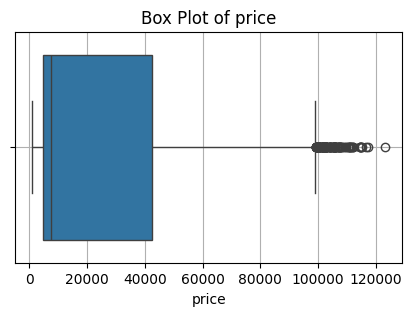

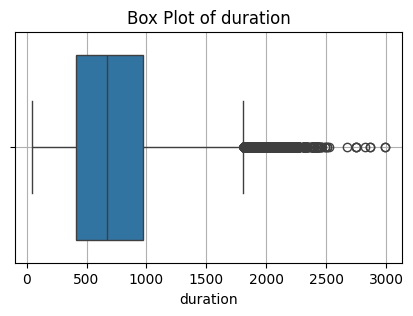

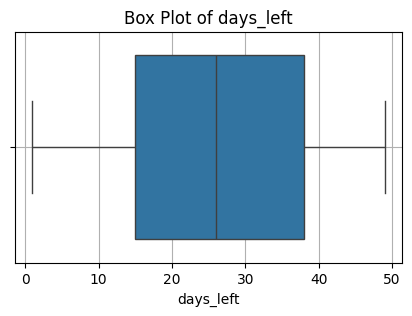

In [747]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.xlabel('duration')
plt.grid()
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x=df['days_left'])
plt.title('Box Plot of days_left')
plt.xlabel('days_left')
plt.grid()
plt.show()

- unsually expensive flights are seen

**handling outliers**


In [748]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(df.head())

   Index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  days_left  price  duration  
0           Mumbai  Economy          1   5953       130  
1           Mumbai  Economy          1   5953       139  
2           Mumbai  Economy          1   5956       130  
3           Mumbai  Economy          1   5955       135  
4           Mumbai  Economy          1   5955       139  


In [749]:
# Calculate Q1, Q3, and IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

print(df.head())

   Index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  days_left  price  duration  
0           Mumbai  Economy          1   5953       130  
1           Mumbai  Economy          1   5953       139  
2           Mumbai  Economy          1   5956       130  
3           Mumbai  Economy          1   5955       135  
4           Mumbai  Economy          1   5955       139  


**after removal of outlier**

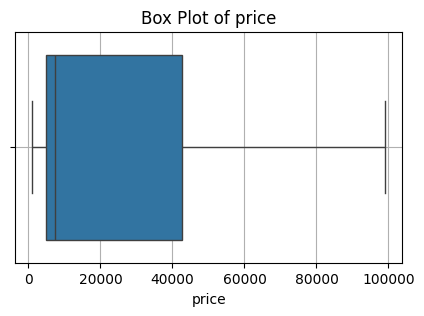

In [750]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['price'])
plt.title('Box Plot of price')
plt.xlabel('price')
plt.grid()
plt.show()

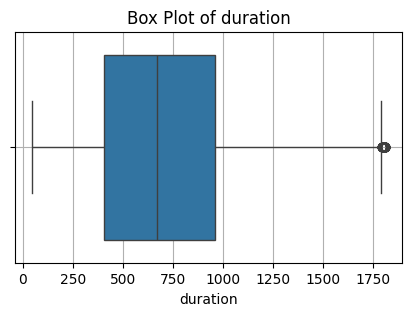

In [751]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.xlabel('duration')
plt.grid()
plt.show()

In [752]:
# Calculate Q1, Q3, and IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

print(df)

         Index   airline   flight source_city departure_time stops  \
0            0  SpiceJet  SG-8709       Delhi        Evening  zero   
1            1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3   Vistara   UK-995       Delhi        Morning  zero   
4            4   Vistara   UK-963       Delhi        Morning  zero   
...        ...       ...      ...         ...            ...   ...   
300148  300148   Vistara   UK-822     Chennai        Morning   one   
300149  300149   Vistara   UK-826     Chennai      Afternoon   one   
300150  300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151  300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152  300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  days_left  price  duration  
0               Night           Mumbai   Economy          1   5953       130  
1

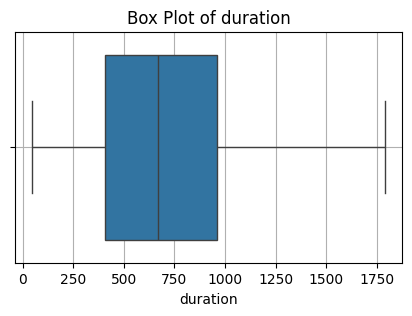

In [753]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['duration'])
plt.title('Box Plot of duration')
plt.xlabel('duration')
plt.grid()
plt.show()

# basic eda

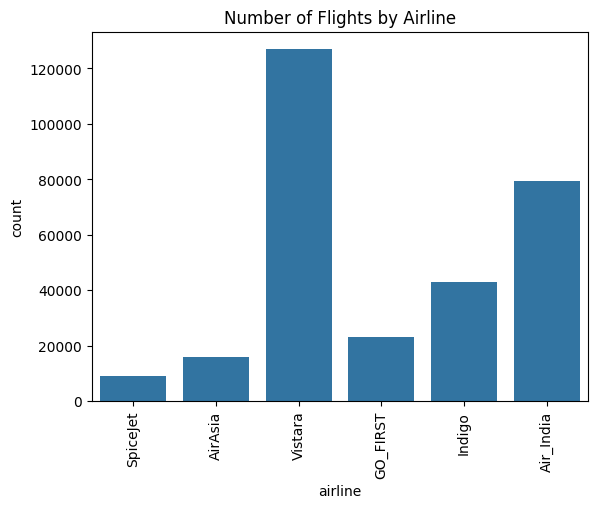

In [754]:
sns.countplot(x='airline', data=df)
plt.title('Number of Flights by Airline')
plt.xticks(rotation=90) 
plt.show()


- Airline vistara is more in dataset than others, where as spicejet is less used

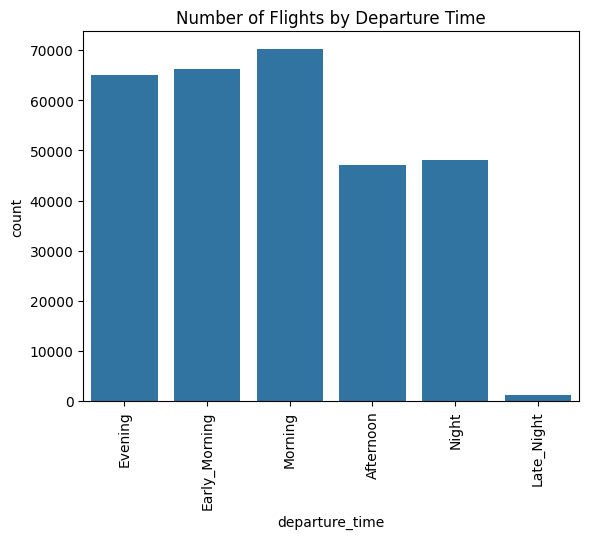

In [755]:
sns.countplot(x='departure_time', data=df)
plt.title('Number of Flights by Departure Time')
plt.xticks(rotation=90) 
plt.show()


- morning flights are most used and late night flights are less used

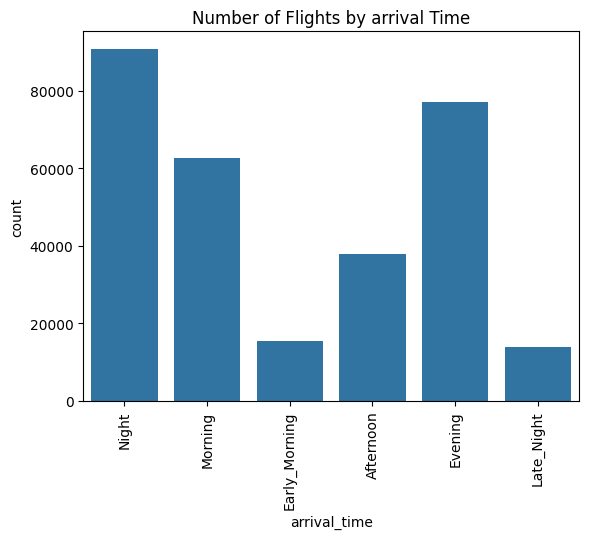

In [756]:
sns.countplot(x='arrival_time', data=df)
plt.title('Number of Flights by arrival Time')
plt.xticks(rotation=90) 
plt.show()


- destination is usually reached at night time

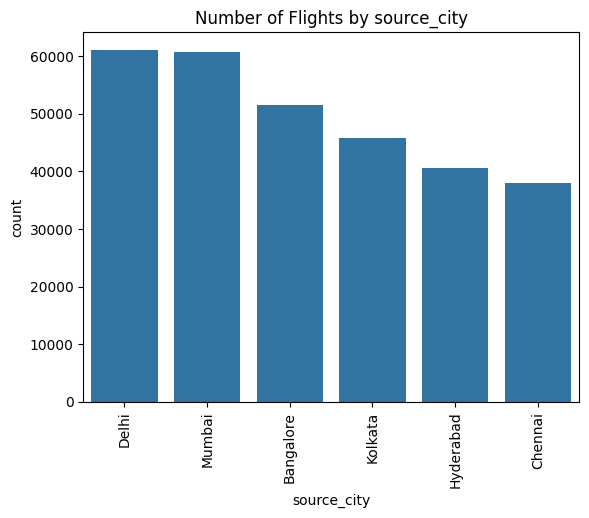

In [757]:
sns.countplot(x='source_city', data=df)
plt.title('Number of Flights by source_city')
plt.xticks(rotation=90) 
plt.show()


- people take most flights from city delhi

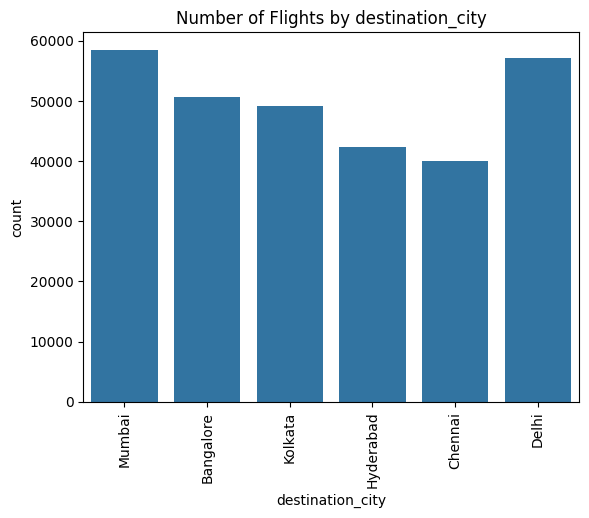

In [758]:
sns.countplot(x='destination_city', data=df)
plt.title('Number of Flights by destination_city')
plt.xticks(rotation=90) 
plt.show()


- people come to delhi city more

In [759]:
#encoded values into new csv file named "cleaned.csv"
df.to_csv("Clean_Dataset1.csv", index=False)

In [760]:
# now cleaned.csv acts as a dataframe
df=pd.read_csv('Clean_Dataset1.csv')
df.head()

,Index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953,130
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953,139
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956,130
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955,135
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955,139


**encoding for categorical values**

In [761]:
df.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [762]:
# Mapping categories to specific times (using 24-hour format for consistency)
time_mapping = {
    'Early_Morning': '05:00:00',
    'Morning': '08:00:00',
    'Afternoon': '14:00:00',
    'Evening': '18:00:00',
    'Night': '21:00:00',
    'Late_Night': '23:00:00'
}

# Map the categorical times to actual time strings (not datetime)
df['departure_time'] = pd.to_datetime(df['departure_time'].map(time_mapping), format='%H:%M:%S').dt.strftime('%H:%M:%S')
df['arrival_time'] = pd.to_datetime(df['arrival_time'].map(time_mapping), format='%H:%M:%S').dt.strftime('%H:%M:%S')

# Convert to datetime for calculation
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S').dt.time
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S').dt.time

print(df[['departure_time', 'arrival_time']])


       departure_time arrival_time
0            18:00:00     21:00:00
1            05:00:00     08:00:00
2            05:00:00     05:00:00
3            08:00:00     14:00:00
4            08:00:00     08:00:00
...               ...          ...
297689       08:00:00     18:00:00
297690       14:00:00     21:00:00
297691       05:00:00     21:00:00
297692       05:00:00     18:00:00
297693       08:00:00     18:00:00

[297694 rows x 2 columns]


In [763]:
df.head()

,Index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,duration
0,0,SpiceJet,SG-8709,Delhi,18:00:00,zero,21:00:00,Mumbai,Economy,1,5953,130
1,1,SpiceJet,SG-8157,Delhi,05:00:00,zero,08:00:00,Mumbai,Economy,1,5953,139
2,2,AirAsia,I5-764,Delhi,05:00:00,zero,05:00:00,Mumbai,Economy,1,5956,130
3,3,Vistara,UK-995,Delhi,08:00:00,zero,14:00:00,Mumbai,Economy,1,5955,135
4,4,Vistara,UK-963,Delhi,08:00:00,zero,08:00:00,Mumbai,Economy,1,5955,139


In [764]:
# Combine source and destination cities into a single 'route' feature
df['route'] = df['source_city'] + ' to ' + df['destination_city']

# Display the result
print(df[['source_city', 'destination_city', 'route']])

       source_city destination_city                 route
0            Delhi           Mumbai       Delhi to Mumbai
1            Delhi           Mumbai       Delhi to Mumbai
2            Delhi           Mumbai       Delhi to Mumbai
3            Delhi           Mumbai       Delhi to Mumbai
4            Delhi           Mumbai       Delhi to Mumbai
...            ...              ...                   ...
297689     Chennai        Hyderabad  Chennai to Hyderabad
297690     Chennai        Hyderabad  Chennai to Hyderabad
297691     Chennai        Hyderabad  Chennai to Hyderabad
297692     Chennai        Hyderabad  Chennai to Hyderabad
297693     Chennai        Hyderabad  Chennai to Hyderabad

[297694 rows x 3 columns]


In [765]:
df.drop(['source_city', 'destination_city'],axis=1,inplace=True)

In [766]:
# Calculate correlation between 'index' and 'price'
correlation = df['Index'].corr(df['price'])

# Print the result
print(f"Correlation between index and price: {correlation}")

Correlation between index and price: 0.7624620447342803


since index is just ID also correlation of 0.76 might simply reflect the fact that the data is ordered in a particular way(increasing order), so we can drop index

In [767]:
df.drop(['Index'],axis=1,inplace=True)

In [768]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [769]:
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
#replacing stops string input into equivalent numeric values

In [770]:
# Apply One-Hot Encoding to both 'airline' and 'flight' columns
df = pd.get_dummies(df, columns=['airline', 'class'])


In [771]:
df.columns

Index(['flight', 'departure_time', 'stops', 'arrival_time', 'days_left',
       'price', 'duration', 'route', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'class_Business', 'class_Economy'],
      dtype='object')

In [772]:
# Convert only True/False columns to 1/0
df[[ 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'class_Business', 'class_Economy']] = df[[ 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'class_Business', 'class_Economy']].astype(int)

# Display the result
print(df)

         flight departure_time  stops arrival_time  days_left  price  \
0       SG-8709       18:00:00      0     21:00:00          1   5953   
1       SG-8157       05:00:00      0     08:00:00          1   5953   
2        I5-764       05:00:00      0     05:00:00          1   5956   
3        UK-995       08:00:00      0     14:00:00          1   5955   
4        UK-963       08:00:00      0     08:00:00          1   5955   
...         ...            ...    ...          ...        ...    ...   
297689   UK-822       08:00:00      1     18:00:00         49  69265   
297690   UK-826       14:00:00      1     21:00:00         49  77105   
297691   UK-832       05:00:00      1     21:00:00         49  79099   
297692   UK-828       05:00:00      1     18:00:00         49  81585   
297693   UK-822       08:00:00      1     18:00:00         49  81585   

        duration                 route  airline_AirAsia  airline_Air_India  \
0            130       Delhi to Mumbai                0  

In [773]:
df

,flight,departure_time,stops,arrival_time,days_left,price,duration,route,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,class_Business,class_Economy
0,SG-8709,18:00:00,0,21:00:00,1,5953,130,Delhi to Mumbai,0,0,0,0,1,0,0,1
1,SG-8157,05:00:00,0,08:00:00,1,5953,139,Delhi to Mumbai,0,0,0,0,1,0,0,1
2,I5-764,05:00:00,0,05:00:00,1,5956,130,Delhi to Mumbai,1,0,0,0,0,0,0,1
3,UK-995,08:00:00,0,14:00:00,1,5955,135,Delhi to Mumbai,0,0,0,0,0,1,0,1
4,UK-963,08:00:00,0,08:00:00,1,5955,139,Delhi to Mumbai,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297689,UK-822,08:00:00,1,18:00:00,49,69265,604,Chennai to Hyderabad,0,0,0,0,0,1,1,0
297690,UK-826,14:00:00,1,21:00:00,49,77105,625,Chennai to Hyderabad,0,0,0,0,0,1,1,0
297691,UK-832,05:00:00,1,21:00:00,49,79099,829,Chennai to Hyderabad,0,0,0,0,0,1,1,0
297692,UK-828,05:00:00,1,18:00:00,49,81585,600,Chennai to Hyderabad,0,0,0,0,0,1,1,0


flight generally mean flight code, which is generally different for every flight of airline, so dropping it

In [774]:
df.drop(['flight'],axis=1,inplace=True)

In [775]:
categorical_variables = ['route']

df_clean_encoded = pd.get_dummies(df, columns=categorical_variables, drop_first=False)

print(df_clean_encoded.dtypes)


departure_time                  object
stops                            int64
arrival_time                    object
days_left                        int64
price                            int64
duration                         int64
airline_AirAsia                  int64
airline_Air_India                int64
airline_GO_FIRST                 int64
airline_Indigo                   int64
airline_SpiceJet                 int64
airline_Vistara                  int64
class_Business                   int64
class_Economy                    int64
route_Bangalore to Chennai        bool
route_Bangalore to Delhi          bool
route_Bangalore to Hyderabad      bool
route_Bangalore to Kolkata        bool
route_Bangalore to Mumbai         bool
route_Chennai to Bangalore        bool
route_Chennai to Delhi            bool
route_Chennai to Hyderabad        bool
route_Chennai to Kolkata          bool
route_Chennai to Mumbai           bool
route_Delhi to Bangalore          bool
route_Delhi to Chennai   

In [776]:
boolean_columns = df_clean_encoded.select_dtypes(include='bool').columns
df[boolean_columns] = df_clean_encoded[boolean_columns].astype(int)
print(df.head())


  departure_time  stops arrival_time  days_left  price  duration  \
0       18:00:00      0     21:00:00          1   5953       130   
1       05:00:00      0     08:00:00          1   5953       139   
2       05:00:00      0     05:00:00          1   5956       130   
3       08:00:00      0     14:00:00          1   5955       135   
4       08:00:00      0     08:00:00          1   5955       139   

             route  airline_AirAsia  airline_Air_India  airline_GO_FIRST  ...  \
0  Delhi to Mumbai                0                  0                 0  ...   
1  Delhi to Mumbai                0                  0                 0  ...   
2  Delhi to Mumbai                1                  0                 0  ...   
3  Delhi to Mumbai                0                  0                 0  ...   
4  Delhi to Mumbai                0                  0                 0  ...   

   route_Kolkata to Bangalore  route_Kolkata to Chennai  \
0                           0                

In [777]:
df.columns


Index(['departure_time', 'stops', 'arrival_time', 'days_left', 'price',
       'duration', 'route', 'airline_AirAsia', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'class_Business', 'class_Economy',
       'route_Bangalore to Chennai', 'route_Bangalore to Delhi',
       'route_Bangalore to Hyderabad', 'route_Bangalore to Kolkata',
       'route_Bangalore to Mumbai', 'route_Chennai to Bangalore',
       'route_Chennai to Delhi', 'route_Chennai to Hyderabad',
       'route_Chennai to Kolkata', 'route_Chennai to Mumbai',
       'route_Delhi to Bangalore', 'route_Delhi to Chennai',
       'route_Delhi to Hyderabad', 'route_Delhi to Kolkata',
       'route_Delhi to Mumbai', 'route_Hyderabad to Bangalore',
       'route_Hyderabad to Chennai', 'route_Hyderabad to Delhi',
       'route_Hyderabad to Kolkata', 'route_Hyderabad to Mumbai',
       'route_Kolkata to Bangalore', 'route_Kolkata to Chennai',
       'route_Kolkata to De

In [778]:
df.dtypes

departure_time                  object
stops                            int64
arrival_time                    object
days_left                        int64
price                            int64
duration                         int64
route                           object
airline_AirAsia                  int64
airline_Air_India                int64
airline_GO_FIRST                 int64
airline_Indigo                   int64
airline_SpiceJet                 int64
airline_Vistara                  int64
class_Business                   int64
class_Economy                    int64
route_Bangalore to Chennai       int64
route_Bangalore to Delhi         int64
route_Bangalore to Hyderabad     int64
route_Bangalore to Kolkata       int64
route_Bangalore to Mumbai        int64
route_Chennai to Bangalore       int64
route_Chennai to Delhi           int64
route_Chennai to Hyderabad       int64
route_Chennai to Kolkata         int64
route_Chennai to Mumbai          int64
route_Delhi to Bangalore 

In [779]:
df.drop(['route'],axis=1,inplace=True)

In [780]:
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Bangalore,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata
0,18:00:00,0,21:00:00,1,5953,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,05:00:00,0,08:00:00,1,5953,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,05:00:00,0,05:00:00,1,5956,130,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,08:00:00,0,14:00:00,1,5955,135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,08:00:00,0,08:00:00,1,5955,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [781]:
# Specify the two columns to compare
col1 = 'departure_time'  # Replace with actual column name
col2 = 'arrival_time'  # Replace with actual column name

# Drop rows where values in both columns are equal
df = df[df[col1] != df[col2]]

df.drop(df[df[col1] == df[col2]].index, inplace=True)


In [782]:
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Bangalore,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata
0,18:00:00,0,21:00:00,1,5953,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,05:00:00,0,08:00:00,1,5953,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,08:00:00,0,14:00:00,1,5955,135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,08:00:00,0,14:00:00,1,5955,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,14:00:00,0,18:00:00,1,6060,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [783]:
# Convert the departure_time column to datetime
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

# Extract just the hour part
df['departure_time'] = df['departure_time'].dt.hour

# Display the DataFrame with departure hours
print(df)
# Convert the departure_time column to datetime
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

# Extract just the hour part
df['arrival_time'] = df['arrival_time'].dt.hour

# Display the DataFrame with departure hours
print(df.head())

        departure_time  stops arrival_time  days_left  price  duration  \
0                   18      0     21:00:00          1   5953       130   
1                    5      0     08:00:00          1   5953       139   
3                    8      0     14:00:00          1   5955       135   
5                    8      0     14:00:00          1   5955       139   
7                   14      0     18:00:00          1   6060       130   
...                ...    ...          ...        ...    ...       ...   
297689               8      1     18:00:00         49  69265       604   
297690              14      1     21:00:00         49  77105       625   
297691               5      1     21:00:00         49  79099       829   
297692               5      1     18:00:00         49  81585       600   
297693               8      1     18:00:00         49  81585       604   

        airline_AirAsia  airline_Air_India  airline_GO_FIRST  airline_Indigo  \
0                     0        

In [784]:
df.dtypes

departure_time                  int32
stops                           int64
arrival_time                    int32
days_left                       int64
price                           int64
duration                        int64
airline_AirAsia                 int64
airline_Air_India               int64
airline_GO_FIRST                int64
airline_Indigo                  int64
airline_SpiceJet                int64
airline_Vistara                 int64
class_Business                  int64
class_Economy                   int64
route_Bangalore to Chennai      int64
route_Bangalore to Delhi        int64
route_Bangalore to Hyderabad    int64
route_Bangalore to Kolkata      int64
route_Bangalore to Mumbai       int64
route_Chennai to Bangalore      int64
route_Chennai to Delhi          int64
route_Chennai to Hyderabad      int64
route_Chennai to Kolkata        int64
route_Chennai to Mumbai         int64
route_Delhi to Bangalore        int64
route_Delhi to Chennai          int64
route_Delhi 

In [785]:
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Bangalore,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata
0,18,0,21,1,5953,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,8,1,5953,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,14,1,5955,135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,0,14,1,5955,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,14,0,18,1,6060,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [786]:
#encoded values into new csv file named "cleaned.csv"
df.to_csv("cleaned.csv", index=False)

In [787]:
# now cleaned.csv acts as a dataframe
df=pd.read_csv('cleaned.csv')
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Bangalore,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata
0,18,0,21,1,5953,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,8,1,5953,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,14,1,5955,135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,14,1,5955,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,18,1,6060,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA Task

In [788]:
#imported necessary library function and datasets for this project 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv('Clean_Dataset1.csv')

**1.target variable analysis**

**price binning**
- categorizing price into bins(low,mid,high) to analyze the pattern

In [789]:
df.describe().price

count    297694.000000
mean      20884.772975
std       22676.463520
min        1105.000000
25%        4756.250000
50%        7424.000000
75%       42521.000000
max       98972.000000
Name: price, dtype: float64

In [790]:
price_bins = [1105, 4783,42521,123071 ]  
price_labels = ['low', 'middle', 'high']
df['price Group'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

print("Dataset after Binning Age:")
print(df[['price', 'price Group']])

Dataset after Binning Age:
        price price Group
0        5953      middle
1        5953      middle
2        5956      middle
3        5955      middle
4        5955      middle
...       ...         ...
297689  69265        high
297690  77105        high
297691  79099        high
297692  81585        high
297693  81585        high

[297694 rows x 2 columns]


- hence price we categorized

In [791]:
df['price Group'] = df['price Group'].replace({'low': 0, 'middle': 1, 'high': 2})

In [792]:
df['price Group'] = df['price Group'].astype('category').cat.codes.astype('int64')

In [793]:
df.dtypes

Index                int64
airline             object
flight              object
source_city         object
departure_time      object
stops               object
arrival_time        object
destination_city    object
class               object
days_left            int64
price                int64
duration             int64
price Group          int64
dtype: object

**2.categorical feature analysis**

**airplane vs price**

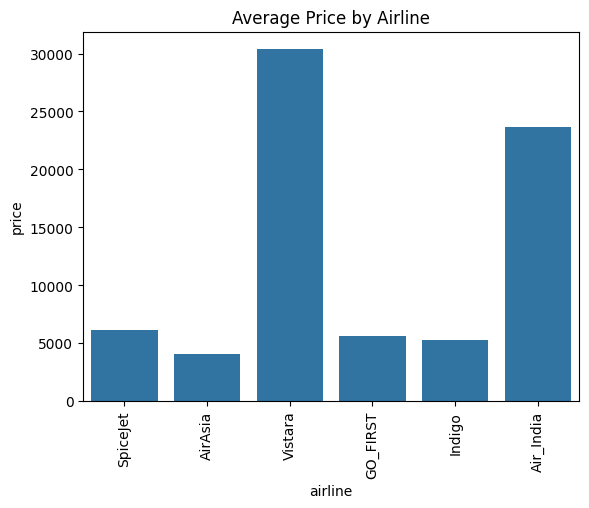

In [794]:
sns.barplot(x='airline', y='price', data=df, ci=None)
plt.title('Average Price by Airline')
plt.xticks(rotation=90)
plt.show()


- vistara has high price tickets and airasia has low price tickets

**premium airline vs budget airline**

In [795]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration', 'price Group'],
      dtype='object')

In [796]:
median_price = df['price'].median()

avg_prices = df.groupby('airline')['price'].median()

airline_category = avg_prices.apply(lambda x: 'Premium' if x > median_price else 'Budget')

print("Median Ticket Price:", median_price)
print("\nAverage Ticket Price per Airline:\n", avg_prices)
print("\nAirline Classification:\n", airline_category)

Median Ticket Price: 7424.0

Average Ticket Price per Airline:
 airline
AirAsia       3276.0
Air_India    11584.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15543.0
Name: price, dtype: float64

Airline Classification:
 airline
AirAsia       Budget
Air_India    Premium
GO_FIRST      Budget
Indigo        Budget
SpiceJet      Budget
Vistara      Premium
Name: price, dtype: object


- thus AirIndia and Vistara we found to be premium airline

In [797]:
df.columns

Index(['Index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left', 'price',
       'duration', 'price Group'],
      dtype='object')

In [798]:
df.dtypes

Index                int64
airline             object
flight              object
source_city         object
departure_time      object
stops               object
arrival_time        object
destination_city    object
class               object
days_left            int64
price                int64
duration             int64
price Group          int64
dtype: object

**class vs price**

      class    price
0  Business  53164.0
1   Economy   5761.0


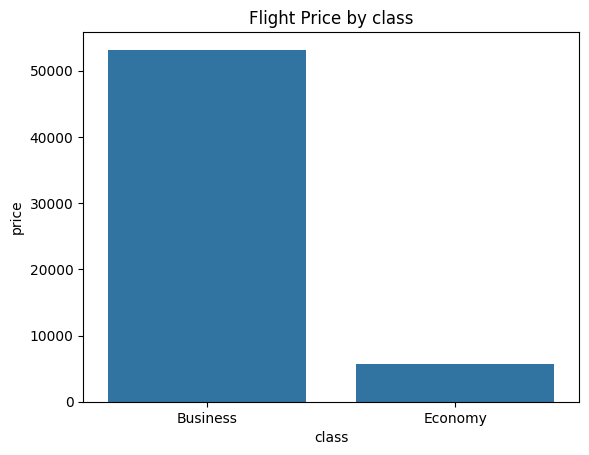

In [799]:
stops_price = df.groupby('class')['price'].median().reset_index()
print(stops_price)

sns.barplot(x='class', y='price', data=stops_price)
plt.title('Flight Price by class')
plt.show()

business class price is much greater than economy class

**source and destination cities impact**

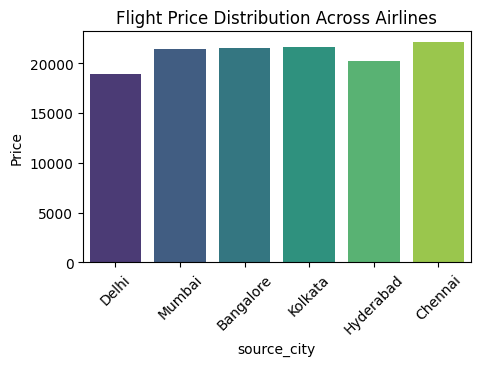

In [800]:
plt.figure(figsize=(5, 3))
sns.barplot(x='source_city', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across Airlines")
plt.xlabel("source_city")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


- flights to chennai has more ticket price

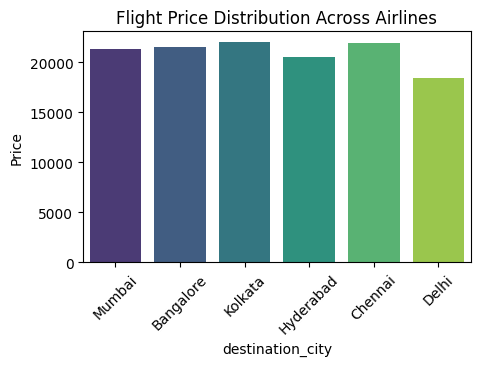

In [801]:
plt.figure(figsize=(5, 3))
sns.barplot(x='destination_city', y='price', data=df, palette='viridis', ci=None)
plt.title("Flight Price Distribution Across Airlines")
plt.xlabel("destination_city")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


- flights from kolkata and chennai has more price

**number of stops vs price** 

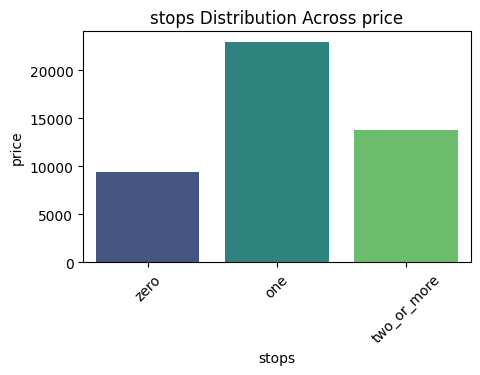

In [802]:
plt.figure(figsize=(5, 3))
sns.barplot(x='stops', y='price', data=df, palette='viridis', ci=None)
plt.title("stops Distribution Across price")
plt.xlabel("stops")
plt.ylabel("price")
plt.xticks(rotation=45)
plt.show()

- 1 stops flights price is seen to be more

**3.time-based analysis**


**days left vs price trend**
- To identify how price fluctuate as departure date approaches

In [803]:
df.describe().days_left

count    297694.000000
mean         26.041620
std          13.549304
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

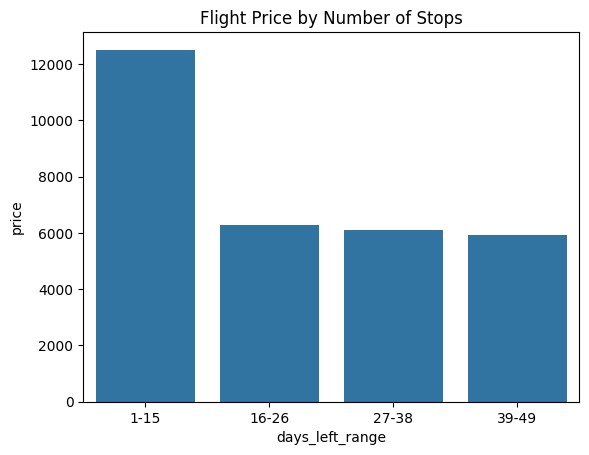

In [804]:
bins = [1, 15, 26, 38, 49]
labels = ['1-15', '16-26', '27-38', '39-49']
df['days_left_range'] = pd.cut(df['days_left'], bins=bins, labels=labels)

stops_price = df.groupby('days_left_range')['price'].median().reset_index()

sns.barplot(x='days_left_range', y='price', data=stops_price)
plt.title('Flight Price by Number of Stops')
plt.show()


- price of tickets are found to be less as the days_left before actual flight is more

**departure and arrival time impact**

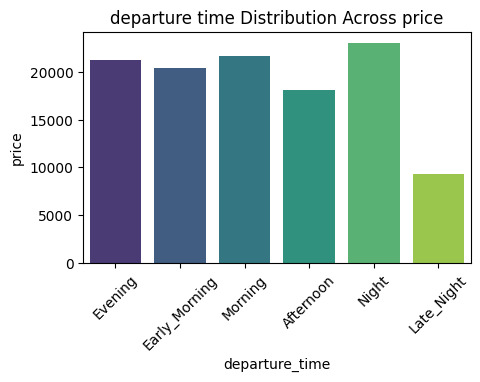

In [805]:
plt.figure(figsize=(5, 3))
sns.barplot(x='departure_time', y='price', data=df, palette='viridis', ci=None)
plt.title("departure time Distribution Across price")
plt.xlabel("departure_time")
plt.ylabel("price")
plt.xticks(rotation=45)
plt.show()

- night time flight costs more

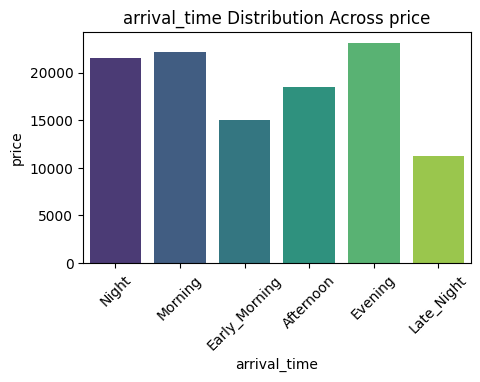

In [806]:
plt.figure(figsize=(5, 3))
sns.barplot(x='arrival_time', y='price', data=df, palette='viridis', ci=None)
plt.title("arrival_time Distribution Across price")
plt.xlabel("arrival_time")
plt.ylabel("price")
plt.xticks(rotation=45)
plt.show()

- peak vs off-peak travel time
- weekday vs weekend pricing trends

**features interactions and derived insights**

In [807]:
df.describe().duration

count    297694.000000
mean        723.157104
std         418.749206
min          49.000000
25%         405.000000
50%         670.000000
75%         960.000000
max        1789.000000
Name: duration, dtype: float64

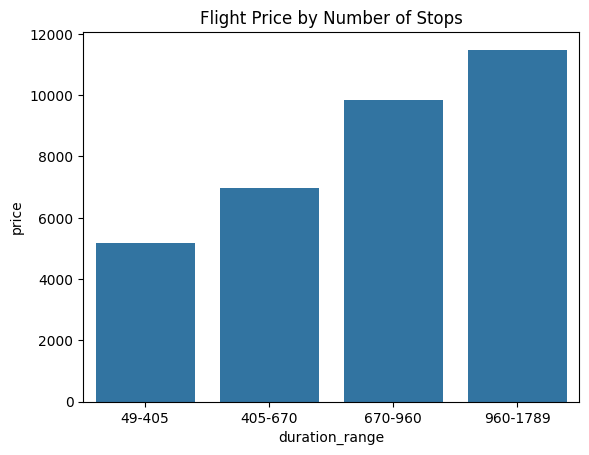

In [808]:
bins = [49, 405, 670,960, 1789]
labels = ['49-405', '405-670', '670-960', '960-1789']
df['duration_range'] = pd.cut(df['duration'], bins=bins, labels=labels)

stops_price = df.groupby('duration_range')['price'].median().reset_index()

sns.barplot(x='duration_range', y='price', data=stops_price)
plt.title('Flight Price by Number of Stops')
plt.show()


- the more duration, the more flight price is seen which is unusual

**airline vs class interaction**

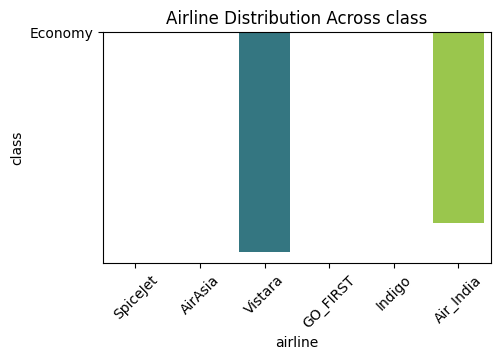

In [809]:
# plt.figure(figsize=(5, 3))
# sns.barplot(x='class', y='airline', data=df, palette='viridis', ci=None)
# plt.title("class Distribution Across airline")
# plt.xlabel("class")
# plt.ylabel("airline")
# plt.xticks(rotation=45)
# plt.show()
plt.figure(figsize=(5, 3))
sns.barplot(x='airline', y='class', data=df, palette='viridis', ci=None)
plt.title("Airline Distribution Across class")
plt.xlabel("airline")
plt.ylabel("class")
plt.xticks(rotation=45)
plt.show()

**feature engineering**
- Flight Age (days left before departure). (exist)
- Price per Kilometer (if distance data available). (distance data not available)
- Red-Eye Flight Indicator (late-night departures). ( late-night flight that departs late in the evening or at night and arrives the following morning)
- Peak Season Flag (based on month).(not given)

In [810]:
# now cleaned.csv acts as a dataframe
df=pd.read_csv('cleaned.csv')
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Bangalore,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata
0,18,0,21,1,5953,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,8,1,5953,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,14,1,5955,135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,14,1,5955,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,18,1,6060,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**red-eye flight indicator**

In [811]:
# Creating new column based on conditions
df['red_eye_flight'] = np.where((df['departure_time'] == 23) & (df['arrival_time'].isin([5, 8])), 5, 8)
df['red_eye_flight'] = df.apply(lambda row: 1 if row['departure_time'] == 23 and row['arrival_time'] in [5, 8] else 0, axis=1)

print(df.head())

   departure_time  stops  arrival_time  days_left  price  duration  \
0              18      0            21          1   5953       130   
1               5      0             8          1   5953       139   
2               8      0            14          1   5955       135   
3               8      0            14          1   5955       139   
4              14      0            18          1   6060       130   

   airline_AirAsia  airline_Air_India  airline_GO_FIRST  airline_Indigo  ...  \
0                0                  0                 0               0  ...   
1                0                  0                 0               0  ...   
2                0                  0                 0               0  ...   
3                0                  0                 0               0  ...   
4                0                  0                 0               0  ...   

   route_Kolkata to Chennai  route_Kolkata to Delhi  \
0                         0                

In [812]:
df.columns

Index(['departure_time', 'stops', 'arrival_time', 'days_left', 'price',
       'duration', 'airline_AirAsia', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'class_Business', 'class_Economy', 'route_Bangalore to Chennai',
       'route_Bangalore to Delhi', 'route_Bangalore to Hyderabad',
       'route_Bangalore to Kolkata', 'route_Bangalore to Mumbai',
       'route_Chennai to Bangalore', 'route_Chennai to Delhi',
       'route_Chennai to Hyderabad', 'route_Chennai to Kolkata',
       'route_Chennai to Mumbai', 'route_Delhi to Bangalore',
       'route_Delhi to Chennai', 'route_Delhi to Hyderabad',
       'route_Delhi to Kolkata', 'route_Delhi to Mumbai',
       'route_Hyderabad to Bangalore', 'route_Hyderabad to Chennai',
       'route_Hyderabad to Delhi', 'route_Hyderabad to Kolkata',
       'route_Hyderabad to Mumbai', 'route_Kolkata to Bangalore',
       'route_Kolkata to Chennai', 'route_Kolkata to Delhi',
       'ro

In [813]:
# import pandas as pd

# # Read the first CSV file (where the column exists)
# df1 = pd.read_csv('Clean_Dataset1.csv')

# # Read the second CSV file (where you want to copy the column)
# df2 = pd.read_csv('cleaned.csv')

# # Select the specific column from the first CSV file
# column_to_add = df1[['price Group']]  # Replace 'column_name' with the actual column name

# # Concatenate the selected column with the second CSV file
# df2 = pd.concat([df2, column_to_add], axis=1)

# # Save the updated second CSV file
# df2.to_csv('cleaned2.csv', index=False)


In [814]:
# df=df.drop(columns=['days_left_range'],axis=1)
# df=df.drop(columns=['duration_range'],axis=1)
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata,red_eye_flight
0,18,0,21,1,5953,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,8,1,5953,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,14,1,5955,135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,0,14,1,5955,139,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14,0,18,1,6060,130,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Skewness

**skewness before scaling**

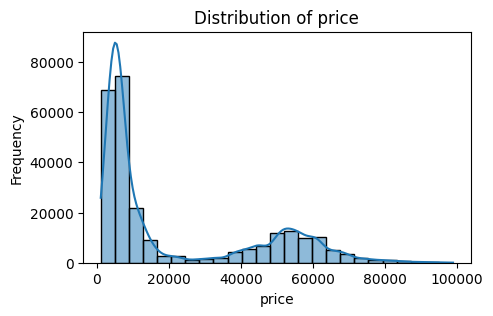

In [815]:
plt.figure(figsize=(5, 3)) # Figsize(width, height)
sns.histplot(data=df["price"], bins=25, kde=True) 
plt.title('Distribution of price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [816]:
print("Skewness value of duration: ", df["duration"].skew())
print("Skewness value of price: ", df["price"].skew())
print("Skewness value of days_left: ", df["days_left"].skew())


Skewness value of duration:  0.689704948415029
Skewness value of price:  1.0287707310833316
Skewness value of days_left:  -0.04031871367662519


q. when normalize and when standardize?

In [817]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to scale
columns_to_scale = ['duration', 'price', 'days_left','departure_time','arrival_time']

# Apply Min-Max Scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

print(df)

        departure_time  stops  arrival_time  days_left     price  duration  \
0             0.722222      0      0.888889        0.0  0.049537  0.046552   
1             0.000000      0      0.166667        0.0  0.049537  0.051724   
2             0.166667      0      0.500000        0.0  0.049557  0.049425   
3             0.166667      0      0.500000        0.0  0.049557  0.051724   
4             0.500000      0      0.722222        0.0  0.050630  0.046552   
...                ...    ...           ...        ...       ...       ...   
258300        0.166667      1      0.722222        1.0  0.696455  0.318966   
258301        0.500000      1      0.888889        1.0  0.776564  0.331034   
258302        0.000000      1      0.888889        1.0  0.796939  0.448276   
258303        0.000000      1      0.722222        1.0  0.822341  0.316667   
258304        0.166667      1      0.722222        1.0  0.822341  0.318966   

        airline_AirAsia  airline_Air_India  airline_GO_FIRST  a

In [818]:
print("Skewness value of duration: ", df["duration"].skew())
print("Skewness value of price: ", df["price"].skew())
print("Skewness value of days_left: ", df["days_left"].skew())


Skewness value of duration:  0.68970494841503
Skewness value of price:  1.0287707310833318
Skewness value of days_left:  -0.04031871367662643


In [819]:
df.to_csv("cleaned2.csv", index=False)

In [820]:
df=pd.read_csv('cleaned2.csv')
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata,red_eye_flight
0,0.722222,0,0.888889,0.0,0.049537,0.046552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0.166667,0.0,0.049537,0.051724,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.166667,0,0.500000,0.0,0.049557,0.049425,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.166667,0,0.500000,0.0,0.049557,0.051724,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.500000,0,0.722222,0.0,0.050630,0.046552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# PCA

In [821]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Load and Preprocess the Data
- Make sure your dataset has no missing values before performing PCA.

In [822]:
# Load dataset
df = pd.read_csv("cleaned2.csv")  # Replace with your actual dataset

# Check for missing values
print(df.isnull().sum())  # Handle missing values if any

# Drop non-numeric columns if they exist (since PCA works on numerical data)
df_numeric = df.select_dtypes(include=[np.number])


departure_time                  0
stops                           0
arrival_time                    0
days_left                       0
price                           0
duration                        0
airline_AirAsia                 0
airline_Air_India               0
airline_GO_FIRST                0
airline_Indigo                  0
airline_SpiceJet                0
airline_Vistara                 0
class_Business                  0
class_Economy                   0
route_Bangalore to Chennai      0
route_Bangalore to Delhi        0
route_Bangalore to Hyderabad    0
route_Bangalore to Kolkata      0
route_Bangalore to Mumbai       0
route_Chennai to Bangalore      0
route_Chennai to Delhi          0
route_Chennai to Hyderabad      0
route_Chennai to Kolkata        0
route_Chennai to Mumbai         0
route_Delhi to Bangalore        0
route_Delhi to Chennai          0
route_Delhi to Hyderabad        0
route_Delhi to Kolkata          0
route_Delhi to Mumbai           0
route_Hyderaba

In [823]:
# Choose the number of principal components (e.g., 2 for visualization, or explained variance)
pca = PCA(n_components=2)  # Adjust as needed
principal_components = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
print(df_pca.head())


        PC1       PC2
0 -2.074077 -1.619562
1 -2.070084 -1.445235
2 -2.122321 -1.428980
3 -1.058884 -2.222122
4 -1.031830 -2.039833


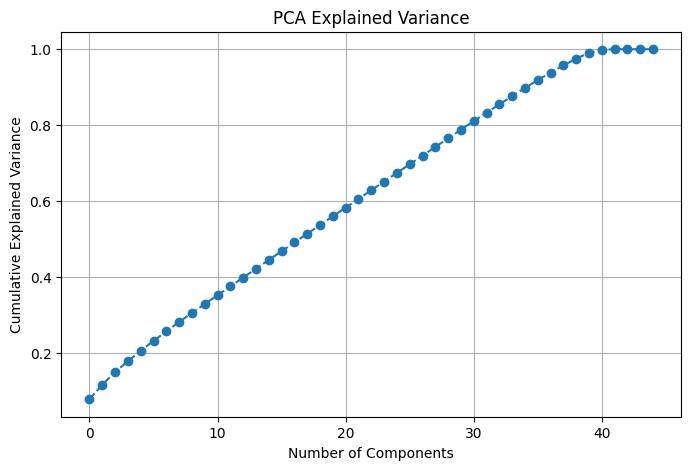

In [824]:
pca_full = PCA()
pca_full.fit(df_scaled)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


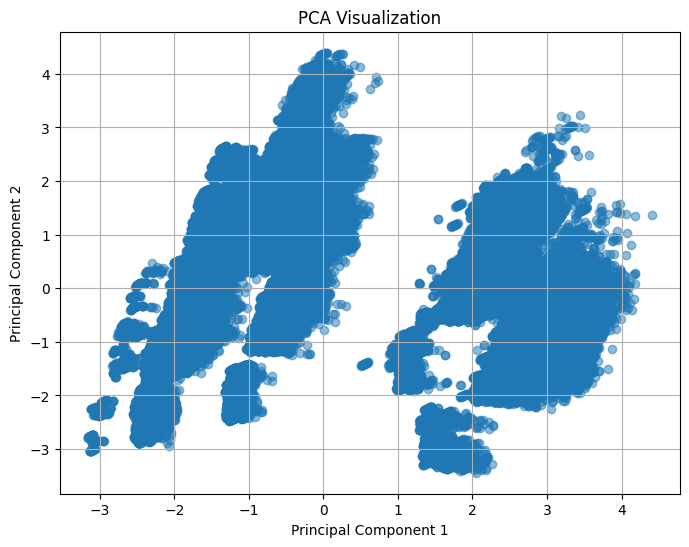

In [825]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid()
plt.show()


In [826]:
print("Original shape:", df_scaled.shape)   # Before PCA
print("Reduced shape:", df_pca.shape)       # After PCA


Original shape: (297920, 45)
Reduced shape: (297920, 2)


In [827]:
df_pca.head()

,PC1,PC2
0,-2.074077,-1.619562
1,-2.070084,-1.445235
2,-2.122321,-1.428980
3,-1.058884,-2.222122
4,-1.031830,-2.039833


In [828]:
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
print("Explained variance by each component:\n", explained_variance)


Explained variance by each component:
 [0.0768843  0.11517577 0.14864688 0.17698189 0.20463455 0.23067653
 0.25630232 0.28061592 0.30451072 0.32802329 0.35133944 0.37458522
 0.39779135 0.42098504 0.44413264 0.46724004 0.49031666 0.51334877
 0.53635281 0.55934247 0.58229847 0.6052298  0.62811484 0.6509803
 0.67381369 0.69662493 0.719414   0.74218686 0.76492688 0.78763206
 0.81029938 0.83266308 0.85469556 0.87656612 0.89779724 0.91866997
 0.93834645 0.95726703 0.97535007 0.99029675 0.9986638  1.
 1.         1.         1.        ]


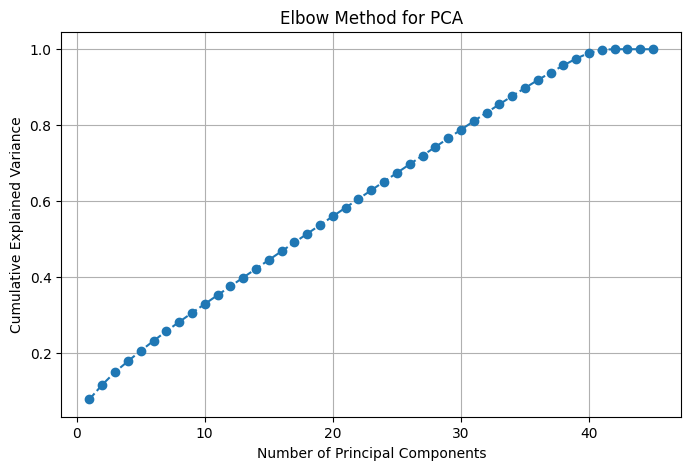

In [829]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for PCA')
plt.grid()
plt.show()


In [830]:
df_pca.to_csv("pca_transformed_data.csv", index=False)


# Model Training


In [831]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [832]:
df = pd.read_csv("cleaned2.csv")
df.head()

,departure_time,stops,arrival_time,days_left,price,duration,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,route_Kolkata to Chennai,route_Kolkata to Delhi,route_Kolkata to Hyderabad,route_Kolkata to Mumbai,route_Mumbai to Bangalore,route_Mumbai to Chennai,route_Mumbai to Delhi,route_Mumbai to Hyderabad,route_Mumbai to Kolkata,red_eye_flight
0,0.722222,0,0.888889,0.0,0.049537,0.046552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0,0.166667,0.0,0.049537,0.051724,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.166667,0,0.500000,0.0,0.049557,0.049425,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.166667,0,0.500000,0.0,0.049557,0.051724,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.500000,0,0.722222,0.0,0.050630,0.046552,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [833]:
df.dtypes

departure_time                  float64
stops                             int64
arrival_time                    float64
days_left                       float64
price                           float64
duration                        float64
airline_AirAsia                   int64
airline_Air_India                 int64
airline_GO_FIRST                  int64
airline_Indigo                    int64
airline_SpiceJet                  int64
airline_Vistara                   int64
class_Business                    int64
class_Economy                     int64
route_Bangalore to Chennai        int64
route_Bangalore to Delhi          int64
route_Bangalore to Hyderabad      int64
route_Bangalore to Kolkata        int64
route_Bangalore to Mumbai         int64
route_Chennai to Bangalore        int64
route_Chennai to Delhi            int64
route_Chennai to Hyderabad        int64
route_Chennai to Kolkata          int64
route_Chennai to Mumbai           int64
route_Delhi to Bangalore          int64


In [834]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['price'])  # Features
y = df['price'] # Target

preparing data for machine learning by separating features and target before splitting them into training and testing.

In [835]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

splits our dataset into training and testing sets for a machine learning models

In [836]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

the code is using the linear regression model to learn the relationship between the features in input data and output we are trying to predict

In [837]:
y_pred = model.predict(X_test)

model is making predictions based on the test data we gave it

In [838]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.043993047924092074
Mean Squared Error (MSE): 0.004430855852921281
R² Score: 0.9199172114987166


The code calculates and prints three metrics to measure how well the model's predictions match the actual test data: MAE, MSE, and R² score

# Conclusion
- model is performing well. it can explain 90% of the variation in the data.

# Test the model

In [839]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [840]:
# data = [{
#     'index': 0,
#     'duration': 130,
#     'days_left': 2,
#     'airline': 3,
#     'departure_time': 4,
#     'source_city': 0,
#     'destination_city': 1,
#     'stops': 0,
#     'arrival': 5,
#     'class': 0,
#     'price Group': 1,
#     'red_eye_flight': 0
# }]
# # Create DataFrame
# df = pd.DataFrame(data)

# # Display DataFrame
# df

In [841]:
# X_train_scaled = scaler.fit_transform(df)
# y_pred = model.predict(X_train_scaled)
# print("the predicted price of flight is ",y_pred)